# **Final Capstone - Suicide Rates**

I will be using various Python libraries to conduct statistical analysis on a dataset that contains data on global suicide rates from 1985 to 2016. This dataset is from [Kaggle.com](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016/code). From my analysis, I hope to gain insights on the factors that contribute most to suicide rates. 

The dataset contains 9,373 cells, 7 columns, 1338 rows. The data types for the respective column names included are Country (String), Year (Number), Sex (String), Age (String), Suicides No (Number), Population (Number), Suicides/100k Pop (Number), Country-Year (String), HDI for year (Number), GDP for Year (Number), GDP per Capita (Number), and Generation (String).

**The 2 hypothesis I will be testing are as follows:**

*- Hypothesis# 1: Are males more likely to commit suicide than females?*

*- Hypothesis# 2: Does being born in a different generation influence the suicide rate of an individual?*

First I will be mounting my Google Drive to Colab so I am able to import my dataset into Colab.

In [70]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Importing the "pandas" and "numpy" libraries + my dataset into Colab and showing a sample view of the features of the dataset

In [71]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/master.csv')

def printDataFrame(df):
  print('The shape of this DataFrame is {}'.format(df.shape))
  print('The columns of this DataFrame are {}'.format(df.columns))

printDataFrame(df)
df.head()

The shape of this DataFrame is (27820, 12)
The columns of this DataFrame are Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### **Hypothesis #1**

Are males more likely to commit suicide than females? 

H₀: µ₁ - µ₂ = 0

Hₐ: µ₁ - µ₂ ≠ 0

where µ is the mean for the male and female samples.

The first step is to discover any null values in the dataset and address them so they do not contaminate my results.

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


As the only field with null values is "HDI for year" and it is a float value, I wil be replacing all null values with the number 0.

In [98]:
df.fillna(0)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.000,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.000,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.000,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.000,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.000,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


Here I will be selecting all rows that contain the value "male" for the sex column and storing them in a variable.

In [99]:
males = df[df['sex'] == 'male']
males.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation


I will then be selecting all rows that contain the value "female" for the sex column and storing them in a variable as well.

In [97]:
females = df[df['sex'] == 'female']
females.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


Before conducting the independent sample t-test, I confirmed that the variables used here are continuous and there is no relationship between the subjects in each sample.

Here I will be importing "seaborn" and "matplotlib" libraries to produce visualizations for each samples distribution and calculate descriptive statistics.

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
males['suicides/100k pop'].describe()

count    13910.000000
mean        20.239329
std         23.552754
min          0.000000
25%          2.422500
50%         13.550000
75%         27.360000
max        224.970000
Name: suicides/100k pop, dtype: float64

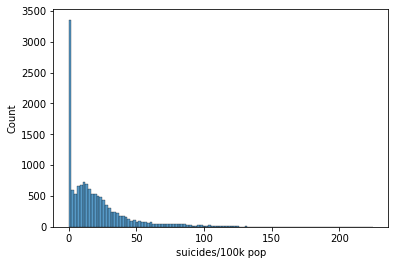

In [79]:
sns.histplot(data=males, x='suicides/100k pop')

Based on this histogram plot, the distribution for the males sample is skewed to the right.

In [80]:
females['suicides/100k pop'].describe()

count    13910.000000
mean         5.392866
std          7.358993
min          0.000000
25%          0.410000
50%          3.160000
75%          7.410000
max        133.420000
Name: suicides/100k pop, dtype: float64

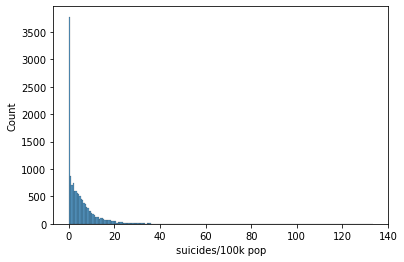

In [81]:
sns.histplot(data=females, x='suicides/100k pop')

As we can see from this histogram plot as well, the distribution for the females sample is also skewed to the right. As both samples are large in observations, a violation of normality may still yield accurate p-values.

I will now be importing "stats" module from the "scipy" library to conduct an independent sample t-test on the male and female samples and calculating the confidence intervals for the difference in samples' means.

In [82]:
from scipy import stats

In [83]:
stats.ttest_ind(males['suicides/100k pop'], females['suicides/100k pop'])

Ttest_indResult(statistic=70.96074900327741, pvalue=0.0)

As we can see, the p-value is well below 0.05 so we can assume there is a significant difference in the means of suicide rates between males and females. I will now be importing the "math" library to calculate the confidence interval.

In [84]:
import math
sample_1_n = males.shape[0]
sample_2_n = females.shape[0]
sample_1_mean = males['suicides/100k pop'].mean()
sample_2_mean = females['suicides/100k pop'].mean()
sample_1_var = males['suicides/100k pop'].var()
sample_2_var = females['suicides/100k pop'].var()

In [85]:
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")
print("The mean difference is {}.".format(mean_difference))

The difference in means at the 95% confidence interval is between -15.25653495858982 and -14.436389556147729.
The mean difference is -14.846462257368774.


I will now produce data visualizations for my findings.

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Male vs Female Boxplot')

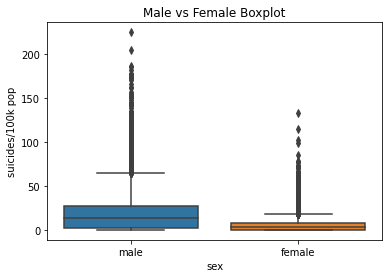

In [87]:
sns.boxplot(y="suicides/100k pop", x="sex", data=df)
plt.title('Male vs Female Boxplot')

From this boxplot, we can see that median suicide rate of females is less than the lower quartile of the suicide rates of males. 

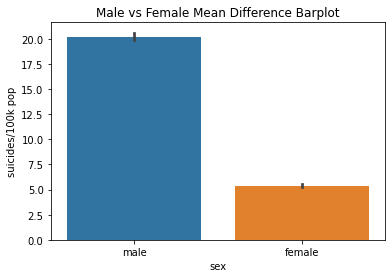

In [88]:
sns.barplot(x = "sex", y = "suicides/100k pop", data=df)
plt.title('Male vs Female Mean Difference Barplot')
plt.show()

Additionally, as we can observe from the barplot, there is a significant 375% increase in the means of suicides/100k pop in males compared to females. Based on these visualizations, I can say that the sex of a person greatly influences their inclination to commit suicide.

### **Hypothesis #2**

Does being born in a different generation influence the suicide rate of an individual? 

H₀: µ₁ - µ₂ = 0

Hₐ: µ₁ - µ₂ ≠ 0

where µ is the mean for the G.I. Generation and Silent generation samples.

First I will be producing a bar graph using "seaborn" to determine the 2 generation groups with the highest suicide rates per 100k population.

In [89]:
df['generation'].values

array(['Generation X', 'Silent', 'Generation X', ..., 'Generation Z',
       'Generation Z', 'Boomers'], dtype=object)

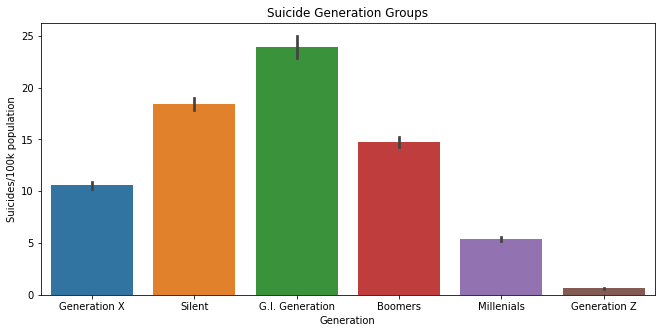

In [90]:
plt.figure(figsize = (11,5))
sns.barplot(x = 'generation', y = "suicides/100k pop", data=df)
plt.xlabel('Generation')
plt.ylabel('Suicides/100k population')
plt.title('Suicide Generation Groups')
plt.show()

As we can see from the graph, the "G.I. Generation" and "Silent" generations have the highest average suicides per 100k population. I will select rows that contain the values of these 2 generations in the "generation" column and place them into variables for further testing.

In [101]:
gi = df[df['generation'] == 'G.I. Generation']
gi.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
10,Albania,1987,female,55-74 years,0,144600,0.00,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
12,Albania,1988,female,75+ years,2,36400,5.49,Albania1988,NaN,"2,126,000,000",769,G.I. Generation


In [102]:
silent = df[df['generation'] == 'Silent']
silent.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
15,Albania,1988,male,35-54 years,14,314100,4.46,Albania1988,NaN,"2,126,000,000",769,Silent
21,Albania,1988,female,35-54 years,4,284500,1.41,Albania1988,NaN,"2,126,000,000",769,Silent
26,Albania,1989,male,35-54 years,15,318400,4.71,Albania1989,NaN,"2,335,124,988",833,Silent


Before conducting the independent sample t-test, I confirmed that the variables used here are continuous and there is no relationship between the subjects in each sample.

I will now produce visualizations for each samples distribution and calculate descriptive statistics.

In [103]:
gi['suicides/100k pop'].describe()

count    2744.000000
mean       23.946378
std        29.431211
min         0.000000
25%         2.997500
50%        13.025000
75%        32.565000
max       224.970000
Name: suicides/100k pop, dtype: float64

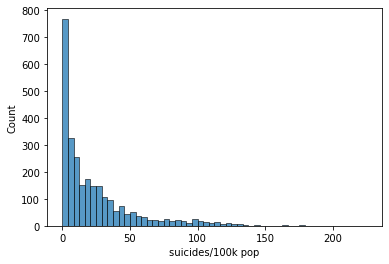

In [104]:
sns.histplot(data=gi, x='suicides/100k pop')

The distribution of the "G.I. Generation" sample is skewed to the right.

In [105]:
silent['suicides/100k pop'].describe()

count    6364.000000
mean       18.418848
std        23.216520
min         0.000000
25%         2.687500
50%        10.735000
75%        23.500000
max       204.920000
Name: suicides/100k pop, dtype: float64

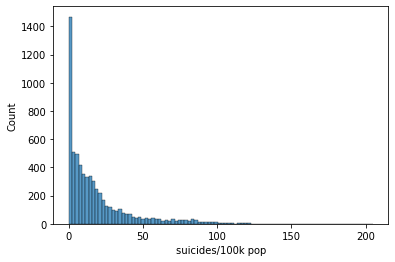

In [106]:
sns.histplot(data=silent, x='suicides/100k pop')

The distribution of the "Silent" generation is also skewed to the right. As previously stated, both samples are large in observations so a violation of normality may still yield accurate p-values.

I will now conduct an independent samples t-test to determine whether there is a significant difference in suicide rates in varying generation groups.

In [93]:
stats.ttest_ind(gi['suicides/100k pop'], silent['suicides/100k pop'])

Ttest_indResult(statistic=9.585485010923026, pvalue=1.1642827822061237e-21)

The p-value is well below 0.05 so we can assume there is a significant difference in the means of suicide rates between varying generation groups. I will now be calculating the confidence interval for the respective samples.

In [94]:
sample_3_n = gi.shape[0]
sample_4_n = silent.shape[0]
sample_3_mean = gi['suicides/100k pop'].mean()
sample_4_mean = silent['suicides/100k pop'].mean()
sample_3_var = gi['suicides/100k pop'].var()
sample_4_var = silent['suicides/100k pop'].var()

std_err_difference2 = math.sqrt((sample_3_var/sample_3_n)+(sample_4_var/sample_4_n))

mean_difference2 = sample_4_mean - sample_3_mean

margin_of_error2 = 1.96 * std_err_difference2
ci_lower = mean_difference2 - margin_of_error2
ci_upper = mean_difference2 + margin_of_error2

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")
print("The mean difference is {}.".format(mean_difference2))

The difference in means at the 95% confidence interval is between -6.767708233241416 and -4.287350451451848.
The mean difference is -5.527529342346632.


I will now be producing data visualizations for the "G.I. Generation" and "Silent" generations showing the suicide rate trend for each group from 1985 to 2016.

In [95]:
top_gens_df = [gi, silent]
top_gens = pd.concat(top_gens_df)
top_gens.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
10,Albania,1987,female,55-74 years,0,144600,0.00,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
12,Albania,1988,female,75+ years,2,36400,5.49,Albania1988,NaN,"2,126,000,000",769,G.I. Generation


Text(0.5, 1.0, 'G.I Generation vs Silent Suicide rates from 1985 - 2016')

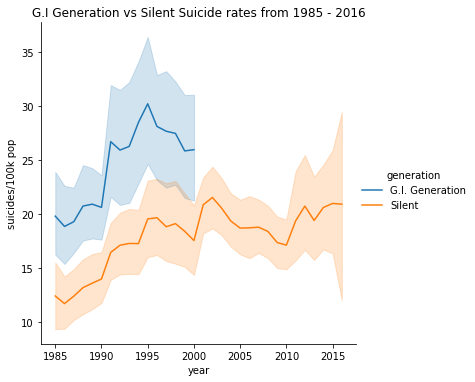

In [96]:
sns.relplot(x="year", y="suicides/100k pop", hue="generation", kind="line", data=top_gens)
plt.title('G.I Generation vs Silent Suicide rates from 1985 - 2016')

As we can see from the relational plot, the 2 generational groups with the highest suicide rates follow a similar trend where both generations' suicide rates slightly increase throughout the years. However, we see about a 30% constant difference between the suicide rates of both generations. We can assume from this graph the generation an individual is born in affects that groups overall suicide rates.

## **Conclusion**


The findings from my analysis of the dataset are as follows:

***1) Males are more likely to commit suicide than females***

***2) Being born in a different generation has an influence on an individual's suicide rate.***

In conclusion, the World Health Organization can use the insights derived from my analysis to target at-risk groups who are more likely to commit suicide and concentrate their efforts to provide aid and help to these groups.